# Project 4, APS1070 Fall 2024
#### **Linear Regression -  14 points**
**Deadline: Nov 29th, 23:00**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself without proper acknowledgment of the source, including generated code (please refer to the course syllabus). Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   Your **name**: 
*   Your **student number**: 

### How to submit **(HTML + IPYNB)**

1. Download your notebook: `File -> Download .ipynb`

2. Click on the Files icon on the far left menu of Colab

3. Select & upload your `.ipynb` file you just downloaded, and then obtain its path (right click) (you might need to hit the Refresh button before your file shows up)


4. execute the following in a Colab cell:
```
%%shell
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb
```

5. An HTML version of your notebook will appear in the files, so you can download it.

6. Submit **both** <font color='red'>`HTML` and `IPYNB`</font>  files for this notebook on Quercus for grading.


Ref: https://stackoverflow.com/a/64487858

In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy import linalg
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## Part 1 - Getting Started [2 marks]

In this project, we are going to design a mathematical model that predicts electrical grid stability, as described in the paper below:

*Schäfer, Benjamin, et al. 'Taming instabilities in power grid networks by decentralized control.' The European Physical Journal Special Topics 225.3 (2016): 569-582.*


For this purpose, we are using the [Electrical Grid Stability](https://archive.ics.uci.edu/dataset/471/electrical+grid+stability+simulated+data) dataset which includes 10000 instances with 12 features describing the power grid's status. The goal is to unravel patterns and predict the `stab` column, which is a characteristic of the grid that represents its stability. Note that you can ignore the last column named `stabf` since this is a binary indicator showing whether the stability is above a certain threshold.

In [177]:
df = pd.read_csv(
    filepath_or_buffer="https://raw.githubusercontent.com/Sabaae/Dataset/main/electrical_grid_stability_simulated_data.csv",
    skipinitialspace=True
)

Here are the steps to complete this portion:

1. Print the dataframe.
2. Prepare your dataset as follows: **[1.5]**
*   Using `train_test_split` from Sklearn, split the dataset into training and validation sets ($80\%$ training, $20\%$ validation). When splitting, set `random_state=111`. **[0.5]**
*   Standardize the data **manually** according to the same method as `StandardScaler` from sklearn, but you may not directly use `StandardScaler'. **[0.5]**
*   Insert a first column of all $1$s in both the training and validation data sets.**[0.5]**
3. Explain why we should not insert the column of $1$s prior to standardization. **[0.5]** <p>
Adding a column of 1s before standardization can bias regression coefficient estimates, as the intercept term won't be standardized and will have a different scale compared to other variables. It's crucial to standardize all features, including the intercept, to maintain consistency in the model's variable scaling.

In [178]:
print(df.head())

       tau1      tau2      tau3      tau4        p1        p2        p3  \
0  2.959060  3.079885  8.381025  9.780754  3.763085 -0.782604 -1.257395   
1  9.304097  4.902524  3.047541  1.369357  5.067812 -1.940058 -1.872742   
2  8.971707  8.848428  3.046479  1.214518  3.405158 -1.207456 -1.277210   
3  0.716415  7.669600  4.486641  2.340563  3.963791 -1.027473 -1.938944   
4  3.134112  7.608772  4.943759  9.857573  3.525811 -1.125531 -1.845975   

         p4        g1        g2        g3        g4      stab     stabf  
0 -1.723086  0.650456  0.859578  0.887445  0.958034  0.055347  unstable  
1 -1.255012  0.413441  0.862414  0.562139  0.781760 -0.005957    stable  
2 -0.920492  0.163041  0.766689  0.839444  0.109853  0.003471  unstable  
3 -0.997374  0.446209  0.976744  0.929381  0.362718  0.028871  unstable  
4 -0.554305  0.797110  0.455450  0.656947  0.820923  0.049860  unstable  


In [179]:
# Split the data into features (X) and target (y)
X = df.drop(['stab', 'stabf'], axis=1)
y = df['stab']

# Split into train and validation sets (80-20 split)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=111)

In [180]:
# Manual standardization
# Calculate mean and std on training data
train_mean = X_train.mean()
train_std = X_train.std()

# Standardize training data
X_train_scaled = (X_train - train_mean) / train_std

# Standardize validation data using training parameters
X_val_scaled = (X_val - train_mean) / train_std

# Add column of 1s AFTER standardization
X_train_final = np.column_stack([np.ones(X_train_scaled.shape[0]), X_train_scaled])
X_val_final = np.column_stack([np.ones(X_val_scaled.shape[0]), X_val_scaled])

print("\nFinal training data shape:", X_train_final.shape)
print("Final validation data shape:", X_val_final.shape)


Final training data shape: (8000, 13)
Final validation data shape: (2000, 13)


## Part 2 - Linear Regression Using Direct Solution [1 marks]

Implement the direct solution of the linear regression problem on the training set. **[0.5]**

**Note: You should use scipy.linalg.inv to perform the inversion, as numpy.linalg.inv may cause an error.**

Report the root-mean-square error (RMSE) for both the training and validation sets. **[0.5]**

You may use `root_mean_squared_error` from Sklearn for computing the RMSE.

In [181]:
# Direct solution for linear regression

# Calculate beta = (X^T X)^(-1) X^T y
X_transpose = X_train_final.T
XTX = np.dot(X_transpose, X_train_final)
XTX_inv = linalg.inv(XTX)
XTy = np.dot(X_transpose, y_train)
beta = np.dot(XTX_inv, XTy)

# Make predictions on training set
y_train_pred = np.dot(X_train_final, beta)

# Make predictions on validation set
y_val_pred = np.dot(X_val_final, beta)


# Calculate RMSE for both sets
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))

print("Training RMSE:", train_rmse)
print("Validation RMSE:", val_rmse)

# Print model coefficients
print("\nModel Coefficients (β):")
feature_names = ['Bias'] + list(X_train.columns)
for feature, coef in zip(feature_names, beta):
    print(f"{feature}: {coef:.4f}")

Training RMSE: 0.021988385118113213
Validation RMSE: 0.021858035187013927

Model Coefficients (β):
Bias: 0.0160
tau1: 0.0098
tau2: 0.0105
tau3: 0.0102
tau4: 0.0103
p1: 204.7089
p2: 118.0480
p3: 117.6749
p4: 117.4605
g1: 0.0104
g2: 0.0106
g3: 0.0111
g4: 0.0104


## Part 3 - Full Batch Gradient Descent [4 marks]

We will now implement a "full batch" gradient descent algorithm and record the training time for our model. Recall that the full batch gradient descent is,
 $$w_t = w_{t-1} - \alpha~g_t$$ where $\alpha$ is the learning rate and $g_t$ is your gradient, computed on the entire data.

Here are the steps for this part:

* Implement gradient descent for linear regression using a fixed learning rate of $\alpha= 0.01$, and iterate until your model's **validation** RMSE converges.

  We consider the gradient descent as having converged when RMSE on the validation set using gradient descent satisfies:

  $$ RMSE_\text{GD} \leq 1.0005 \times RMSE_\text{Direct Solution}$$

  where $RMSE_\text{Direct Solution}$ is the RMSE on the validation set using the direct solution that you calculated in the previous part.

  We refer to the quantity $RMSE_\text{Direct Solution}\times 1.0005$ as the convergence threshold (CT).
  Be sure to compute the gradients yourself! Take a look at the code provided in the tutorial. **[1]**

*  Record the training time (from the first iteration until convergence) using the `time.time()` function. **[0.5]**

* Plot the training RMSE and the validation RMSE vs. epoch on the same figure.  **[1]**

* Comment on overfitting/underfitting by observing the training and validation RMSE **[1]**

    **Hint**: Initialize your weights with small random numbers (<$0.00001$) & please set **np.random.seed(1001)**

* Explain the difference between epoch and iteration in the Gradient descent algorithm (SGD/mini-batch)? **[0.5]** <p>
In gradient descent, an epoch is one complete pass through the entire training dataset, while an iteration is a single update of model parameters. For mini-batch or SGD, an epoch consists of multiple iterations, each processing a subset of the data (batch) to perform gradient updates.

The model  excellent balance between underfitting and overfitting, as evidenced by the  similar trajectories of the training (RMSE: 0.022003) and validation (RMSE: 0.021869) curves throughout the 158 epochs. The initial higher RMSE values around 0.04 suggest slight underfitting at the start, but both curves show consistent and smooth descent without any divergence, indicating healthy learning. The fact that the validation RMSE is marginally better than the training RMSE and both converge to nearly identical values (~0.022) strongly suggests that the model has achieved optimal generalization without overfitting. This behavior, combined with the relatively quick training time of 0.09 seconds and stable convergence to the threshold, indicates that the model has found the sweet spot in the bias-variance tradeoff, successfully capturing the underlying patterns while maintaining robust performance on unseen data.

Converged after 158 epochs
Final Training RMSE: 0.022003
Final Validation RMSE: 0.021869
Convergence Threshold: 0.021869
Training Time: 0.08 seconds


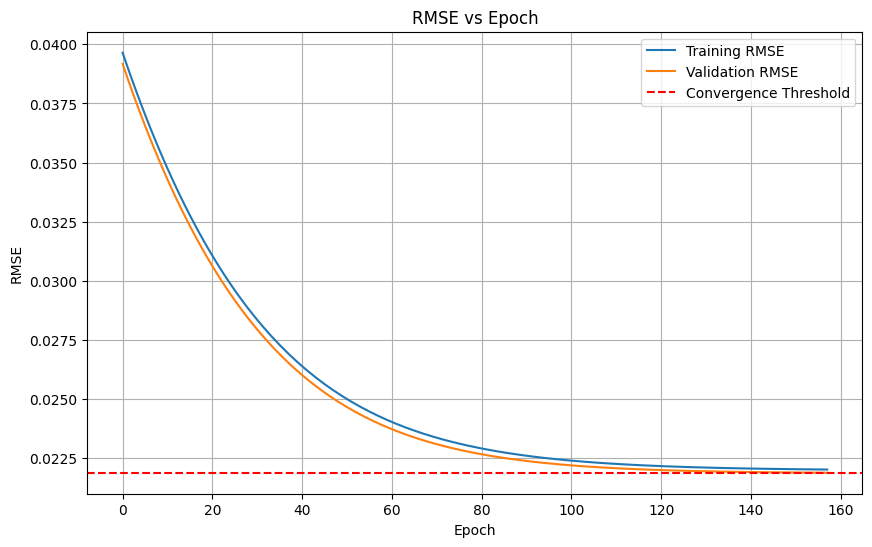

In [182]:
start_time = time.time() ## Records current time

# Set random seed
np.random.seed(1001)

# Initialize weights with small random numbers
w = np.random.rand(X_train_final.shape[1]) * 0.00001

# Initialize lists to store RMSE values for plotting
train_rmse_history = []
val_rmse_history = []

# Set hyperparameters
alpha = 0.01
convergence_threshold = val_rmse * 1.0005  # From direct solution
max_epochs = 10000  # Safety limit

# Start timer
start_time = time.time()

epoch = 0
current_val_rmse = float('inf')

while current_val_rmse > convergence_threshold and epoch < max_epochs:
    # Compute predictions
    y_train_pred = np.dot(X_train_final, w)
    
    # Compute gradient (derived from MSE loss)
    # gradient = -2/n * X^T * (y - Xw)
    gradient = -2/X_train_final.shape[0] * np.dot(X_train_final.T, (y_train - y_train_pred))
    
    # Update weights
    w = w - alpha * gradient
    
    # Calculate RMSE for both sets
    y_train_pred = np.dot(X_train_final, w)
    y_val_pred = np.dot(X_val_final, w)
    
    train_rmse_current = np.sqrt(mean_squared_error(y_train, y_train_pred))
    current_val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
    
    # Store RMSE values
    train_rmse_history.append(train_rmse_current)
    val_rmse_history.append(current_val_rmse)
    
    epoch += 1

# Calculate training time
training_time = time.time() - start_time

print(f"Converged after {epoch} epochs")
print(f"Final Training RMSE: {train_rmse_history[-1]:.6f}")
print(f"Final Validation RMSE: {val_rmse_history[-1]:.6f}")
print(f"Convergence Threshold: {convergence_threshold:.6f}")
print(f"Training Time: {training_time:.2f} seconds")

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(train_rmse_history, label='Training RMSE')
plt.plot(val_rmse_history, label='Validation RMSE')
plt.axhline(y=convergence_threshold, color='r', linestyle='--', label='Convergence Threshold')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('RMSE vs Epoch')
plt.legend()
plt.grid(True)
plt.show()

## Part 4 - Mini-batch and Stochastic Gradient Descent [4 marks]

Write a function that performs mini-batch gradient descent until the convergence threshold (CT) is reached. **[1]**

The inputs of that function are:
  * Input data (training/validation), Batch size, Learning Rate, Convergence Threshold (CT)

Your function will return the following arrays:
 * The final weights after training.
 * The training RMSE at each epoch.
 * The validation RMSE at each epoch.
 * An array that has the elapsed time from the start of the training process to the end of each epoch (e.g., if each epoch takes exactly 2 seconds, the array would look like: [2 4 6 8 ...]).

Notes:
* use **np.random.seed(1001)** before setting the initial (random) weights

  ```
  def mini_batch_gd(YOUR_INPUTS):
    np.random.seed(1001)

    ### YOUR CODE HERE ###
    
    return YOUR_OUTPUTS
  ```

* For certain batch sizes, GD might not converge to a solution. For that reason, you need to check the RMSE of the validation/training set at each epoch, and if it's getting larger and larger, you should stop the training for that case (the design is up to you!).
* CT will help you to know when your model is converged.
* **Important: after each epoch, you need to shuffle the entire training set.** This ensures that new mini-batches are selected for every epoch. Hint: use `np.random.permutation`.

Let's now use the function to investigate the effect of batch size on convergence. When the batch size is 1, we call that stochastic gradient descent. When the batch size equals the # of training data, it is full-batch (i.e., all data points are used at every iteration). Anywhere in between is mini-batch (we use some of the data).
  * Sweep different values for the mini-batch size (at least 5 values that **converge**), each time using a learning rate of $\alpha= 0.01$. **Hint: Try batch sizes that are powers of two (e.g., 2,4,8,16,...).** These batch sizes fit better on the hardware and may achieve higher performance.  **[0.5]**

Provide the following $3$ plots:
  1.  Plot training and validation RMSE vs. **epoch** for all the **converging** batch sizes (some batch sizes might not converge) in a figure. The X-axis is Epoch # and the Y-axis is RMSE. **[0.5]**
  2. Plot training and validation RMSE vs. **time** for all the **converging** batch sizes in a figure. The X-axis is Time, and the Y-axis is RMSE. **[0.5]**
  3. Plot Total training time (y-axis) vs. Batch size (x-axis). **[0.5]**

Describe your findings, including the main takeaways from each of your plots. **[1]**

I tested batch sizes of 2, 8, 16, 32, 64, 128, 256, and 512, and found that the model not converged for batch sizes less than 8. With batch size 8, the model converged in 70 epochs, while larger batch sizes generally required fewer epochs—batch size 16 needed only 1 epoch to converge. For the "RMSE vs Epoch" plot, smaller batch sizes converged faster initially but had more noise compared to larger batches, which showed smoother convergence. Both training and validation RMSE values stayed close, indicating good generalization without overfitting. In the "RMSE vs Time" plot, all batch sizes converged to a similar final RMSE (~0.022) within 0.012 seconds, with larger batches showing less fluctuation. The "Training Time vs Batch Size" plot exhibits a U-shaped relationship: very small batch sizes took longer to converge due to divergence, while training time was minimized at batch sizes around 64. As batch sizes increased beyond 64, the training time began to rise slightly due to greater computational costs per iteration. Thus,  batch sizes (16-32) seem to provide the optimal balance between computational efficiency and convergence speed.


In [183]:
def mini_batch_gd(X_train, y_train, X_val, y_val, batch_size, learning_rate, convergence_threshold):
    # Set random seed
    np.random.seed(1001)
    
    # Ensure input data are numpy arrays
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    X_val = np.array(X_val)
    y_val = np.array(y_val)

    # Initialize parameters
    num_features = X_train.shape[1]
    w = np.random.rand(num_features) * 0.00001
    rmse_train_list = []
    rmse_val_list = []
    epoch_times = []

    # Start timing
    start_time = time.time()
    epoch = 0

    # Calculate the number of batches per epoch
    num_batches = int(np.ceil(len(X_train) / batch_size))

    # Training loop
    while True:
        epoch += 1

        # Shuffle the dataset
        indices = np.random.permutation(len(X_train))
        X_train_shuffled = X_train[indices]
        y_train_shuffled = y_train[indices]

        # Mini-batch gradient descent
        for i in range(num_batches):
            start_idx = i * batch_size
            end_idx = min(start_idx + batch_size, len(X_train))
            X_batch = X_train_shuffled[start_idx:end_idx]
            y_batch = y_train_shuffled[start_idx:end_idx]

            # Compute predictions
            y_pred = np.dot(X_batch, w)

            # Compute gradient
            error = y_pred - y_batch
            gradient = np.dot(X_batch.T, error) / len(y_batch)

            # Update weights
            w -= learning_rate * gradient

        # Compute RMSE on training and validation sets
        y_train_pred = np.dot(X_train, w)
        y_val_pred = np.dot(X_val, w)

        rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
        rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))

        # Record results
        rmse_train_list.append(rmse_train)
        rmse_val_list.append(rmse_val)
        epoch_times.append(time.time() - start_time)

        # Check convergence condition
        if rmse_val <= convergence_threshold:
            print(f'Converged with batch size: {batch_size}')
            print(f'Number of epochs: {epoch}')
            break

        # Prevent infinite loop by setting a maximum number of epochs
        if epoch >= 500:
            print(f'Not converged with batch size: {batch_size}')
            break

    return w, rmse_train_list, rmse_val_list, epoch_times


In [184]:
# Test different batch sizes
batch_sizes = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512]
results = {}

for batch_size in batch_sizes:
    w, rmse_train_array, rmse_val_array, epoch_time = mini_batch_gd(
        X_train_final, y_train, X_val_final, y_val,
        batch_size, learning_rate=0.01,
        convergence_threshold=convergence_threshold
    )
    
    if rmse_val_array[-1] <= convergence_threshold:
        results[batch_size] = {
            'train_rmse': rmse_train_array,
            'val_rmse': rmse_val_array,
            'times': epoch_time
        }

Not converged with batch size: 1
Not converged with batch size: 2
Converged with batch size: 4
Number of epochs: 70
Converged with batch size: 8
Number of epochs: 4
Converged with batch size: 16
Number of epochs: 1
Converged with batch size: 32
Number of epochs: 2
Converged with batch size: 64
Number of epochs: 3
Converged with batch size: 128
Number of epochs: 6
Converged with batch size: 256
Number of epochs: 10
Converged with batch size: 512
Number of epochs: 20


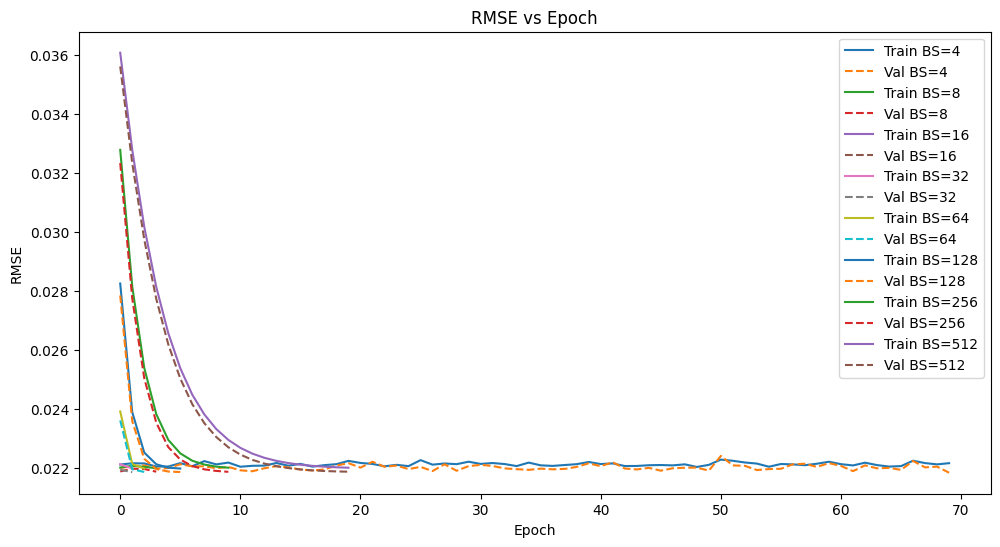

In [185]:
# Create visualizations
plt.figure(figsize=(40, 6))

# Plot 1: RMSE vs Epoch
plt.subplot(131)
for batch_size, data in results.items():
    plt.plot(data['train_rmse'], label=f'Train BS={batch_size}')
    plt.plot(data['val_rmse'], label=f'Val BS={batch_size}', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('RMSE vs Epoch')
plt.legend()


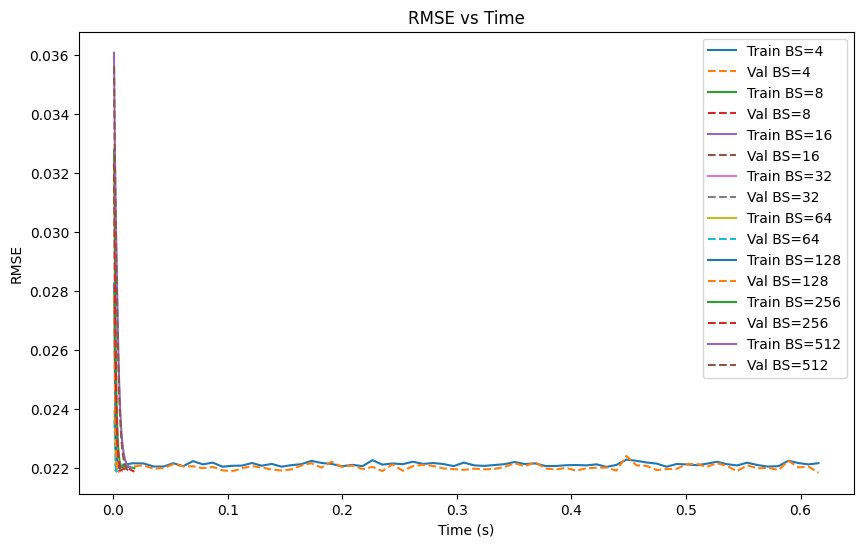

In [186]:
# Plot 2: RMSE vs Time
plt.figure(figsize=(10, 6))
for batch_size, data in results.items():
    plt.plot(data['times'], data['train_rmse'], label=f'Train BS={batch_size}')
    plt.plot(data['times'], data['val_rmse'], label=f'Val BS={batch_size}', linestyle='--')
plt.xlabel('Time (s)')
plt.ylabel('RMSE')
plt.title('RMSE vs Time')
plt.legend()

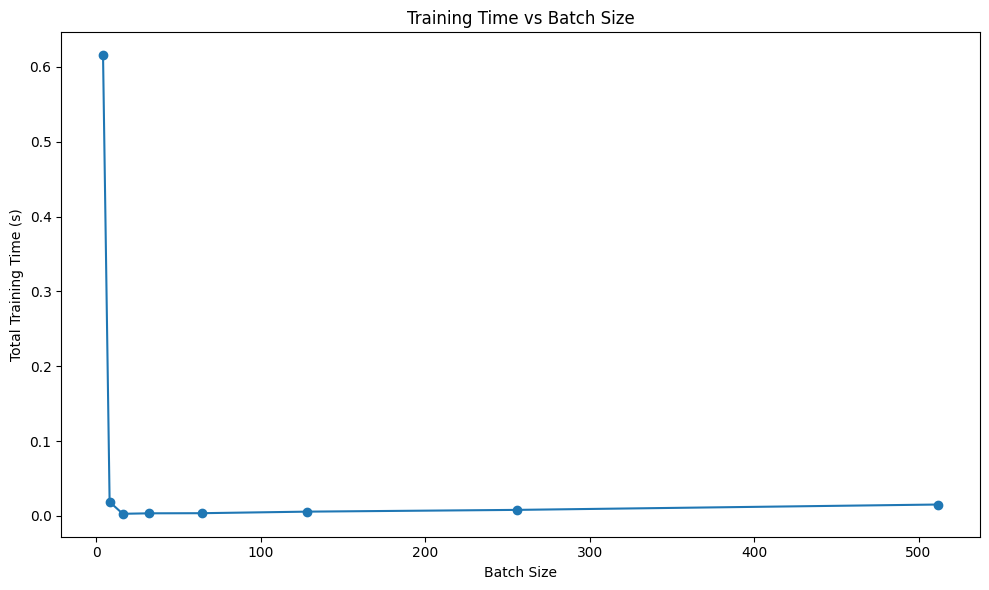

In [187]:
# Plot 3: Training Time vs Batch Size
plt.figure(figsize=(10, 6))
batch_sizes = list(results.keys())
total_times = [data['times'][-1] for data in results.values()]
plt.plot(batch_sizes, total_times, marker='o')
plt.xlabel('Batch Size')
plt.ylabel('Total Training Time (s)')
plt.title('Training Time vs Batch Size')

plt.tight_layout()
plt.show()

## Part 5 - Gradient Descent Learning Rate [3 marks]
Use the function that you designed in Part 4 to investigate the effect of learning rate on convergence.

1. Pick 3 batch sizes that do not converge with a learning rate of $\alpha= 0.01$ (last part) and try to find a learning rate that results in convergence for each batch size. Report your findings in a table. Mention batch size, learning rate, and training and validation RMSE. **[1]**

2. Select the best batch size based on Part 4's fastest convergence time and sweep the learning rate (at least 10 values, all should converge) while applying Mini-batch GD.
  
  * Plot the training and validation RMSE vs. **epoch** (x-axis) for all the learning rates that you tried in a figure. **[0.5]**
  * Plot the training and validation RMSE vs. **time** (x-axis) for all the learning rates that you tried in a figure. **[0.5]**
  * Describe your findings, including the main takeaways from each of your plots. **[1]**

Based on the RMSE vs. time plot, higher learning rates initially show faster reductions in RMSE but tend to converge with higher error, while smaller learning rates achieve lower final RMSE but take more time to converge. Moderate learning rates provide a balance between speed and final error stability.

In [188]:
# Generate learning rates on a logarithmic scale
learning_rates = np.logspace(-4, -2, num=10)[::-1]  # From 0.0001 to 0.01, reversed
batch_sizes = [1, 2, 4] # Adding 4 although its converge in last part however, its require pick 3 batch sizes. Since 4 close to 1 & 2, we can pick it.
results = []

for bs in batch_sizes:
    for lr in learning_rates:
        w, rmse_train_array, rmse_val_array, epoch_time = mini_batch_gd(
            X_train_final, y_train, X_val_final, y_val,
            batch_size=bs, learning_rate=lr,
            convergence_threshold=convergence_threshold
        )
        if rmse_val_array[-1] <= convergence_threshold:
            results.append({
                'Batch Size': bs,
                'Learning Rate': lr,
                'Training RMSE': rmse_train_array[-1],
                'Validation RMSE': rmse_val_array[-1]
            })
            print(f'Converged for batch size {bs} with learning rate {lr}')
            break  # Stop searching when convergence is achieved

Not converged with batch size: 1
Not converged with batch size: 1
Converged with batch size: 1
Number of epochs: 106
Converged for batch size 1 with learning rate 0.003593813663804626
Not converged with batch size: 2
Converged with batch size: 2
Number of epochs: 70
Converged for batch size 2 with learning rate 0.005994842503189409
Converged with batch size: 4
Number of epochs: 70
Converged for batch size 4 with learning rate 0.01


In [189]:
# Define the learning rate
learning_rate = 0.01

# List of batch sizes to test
batch_sizes = [8, 16, 32, 64]

# Lists to store results
total_times = []
epochs_list = []
rmse_train_list = []
rmse_val_list = []

# Loop over each batch size
for bs in batch_sizes:
    w, rmse_train_array, rmse_val_array, epoch_time = mini_batch_gd(
        X_train_final, y_train, X_val_final, y_val,
        batch_size=bs, learning_rate=learning_rate,
        convergence_threshold=convergence_threshold
    )
    # Check if convergence was achieved
    if rmse_val_array[-1] <= convergence_threshold:
        total_times.append(epoch_time[-1])
        epochs_list.append(len(epoch_time))
        rmse_train_list.append(rmse_train_array[-1])
        rmse_val_list.append(rmse_val_array[-1])
        print(f'Batch size {bs} converged in {len(epoch_time)} epochs.')
    else:
        # If not converged, append infinity or None
        total_times.append(float('inf'))
        epochs_list.append(None)
        rmse_train_list.append(None)
        rmse_val_list.append(None)
        print(f'Batch size {bs} did not converge.')

# Create a DataFrame to display the results
results_df = pd.DataFrame({
    'Batch Size': batch_sizes,
    'Total Time': total_times,
    'Epochs': epochs_list,
    'Training RMSE': rmse_train_list,
    'Validation RMSE': rmse_val_list
})

print(results_df)

Converged with batch size: 8
Number of epochs: 4
Batch size 8 converged in 4 epochs.
Converged with batch size: 16
Number of epochs: 1
Batch size 16 converged in 1 epochs.
Converged with batch size: 32
Number of epochs: 2
Batch size 32 converged in 2 epochs.
Converged with batch size: 64
Number of epochs: 3
Batch size 64 converged in 3 epochs.
   Batch Size  Total Time  Epochs  Training RMSE  Validation RMSE
0           8    0.019930       4       0.021988         0.021867
1          16    0.002877       1       0.021978         0.021833
2          32    0.003542       2       0.021976         0.021851
3          64    0.003741       3       0.021975         0.021859


In [190]:
# Test the best batch size for different learning rates
learning_rates = np.logspace(-4, -2, num=10)[::-1]  # From 0.0001 to 0.01
best_batch_size = 8  # Assuming 8 is the best batch size from Part 4
results = {}

for lr in learning_rates:
    print(f'Running Mini-batch GD with learning rate: {lr:.5f}')
    w, rmse_train_array, rmse_val_array, epoch_time = mini_batch_gd(
        X_train_final, y_train, X_val_final, y_val,
        batch_size=best_batch_size, learning_rate=lr,
        convergence_threshold=convergence_threshold
    )
    
    if rmse_val_array[-1] <= convergence_threshold:
        results[lr] = {
            'train_rmse': rmse_train_array,
            'val_rmse': rmse_val_array,
            'times': epoch_time
        }
    else:
        print(f'Learning rate {lr} did not converge.')

Running Mini-batch GD with learning rate: 0.01000
Converged with batch size: 8
Number of epochs: 4
Running Mini-batch GD with learning rate: 0.00599
Converged with batch size: 8
Number of epochs: 1
Running Mini-batch GD with learning rate: 0.00359
Converged with batch size: 8
Number of epochs: 1
Running Mini-batch GD with learning rate: 0.00215
Converged with batch size: 8
Number of epochs: 2
Running Mini-batch GD with learning rate: 0.00129
Converged with batch size: 8
Number of epochs: 3
Running Mini-batch GD with learning rate: 0.00077
Converged with batch size: 8
Number of epochs: 5
Running Mini-batch GD with learning rate: 0.00046
Converged with batch size: 8
Number of epochs: 7
Running Mini-batch GD with learning rate: 0.00028
Converged with batch size: 8
Number of epochs: 12
Running Mini-batch GD with learning rate: 0.00017
Converged with batch size: 8
Number of epochs: 20
Running Mini-batch GD with learning rate: 0.00010
Converged with batch size: 8
Number of epochs: 32


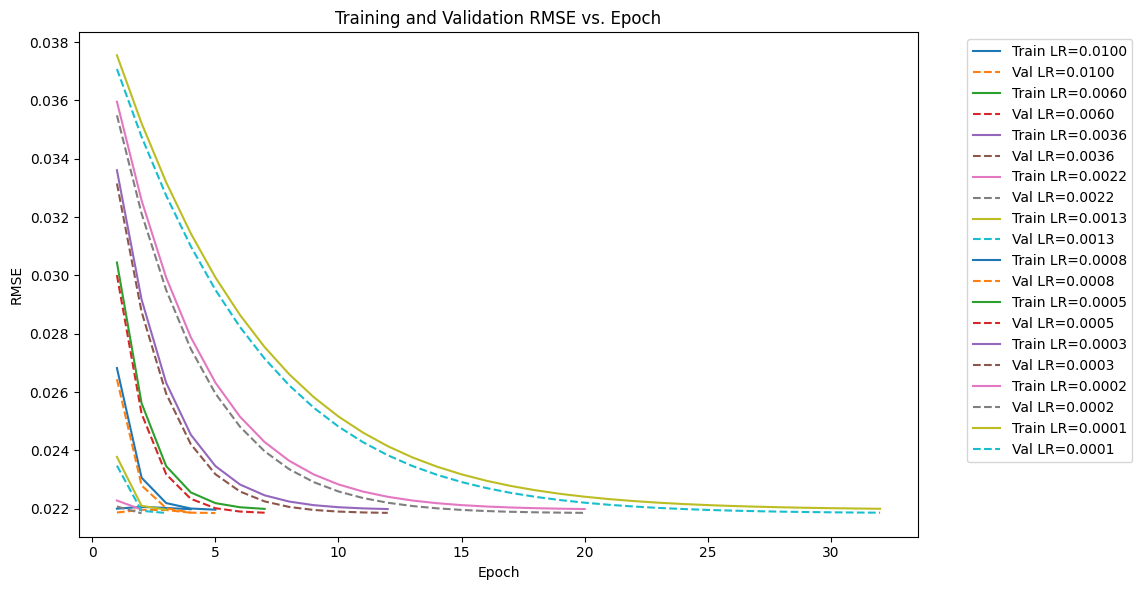

In [191]:
# Create a figure with a more reasonable size
plt.figure(figsize=(20, 6))

# Plot 1: RMSE vs Epoch
plt.subplot(1, 2, 1)  # First subplot in a 1x2 grid
for lr, data in results.items():
    epochs = range(1, len(data['train_rmse']) + 1)
    plt.plot(epochs, data['train_rmse'], label=f'Train LR={lr:.4f}')
    plt.plot(epochs, data['val_rmse'], linestyle='--', label=f'Val LR={lr:.4f}')

plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('Training and Validation RMSE vs. Epoch')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

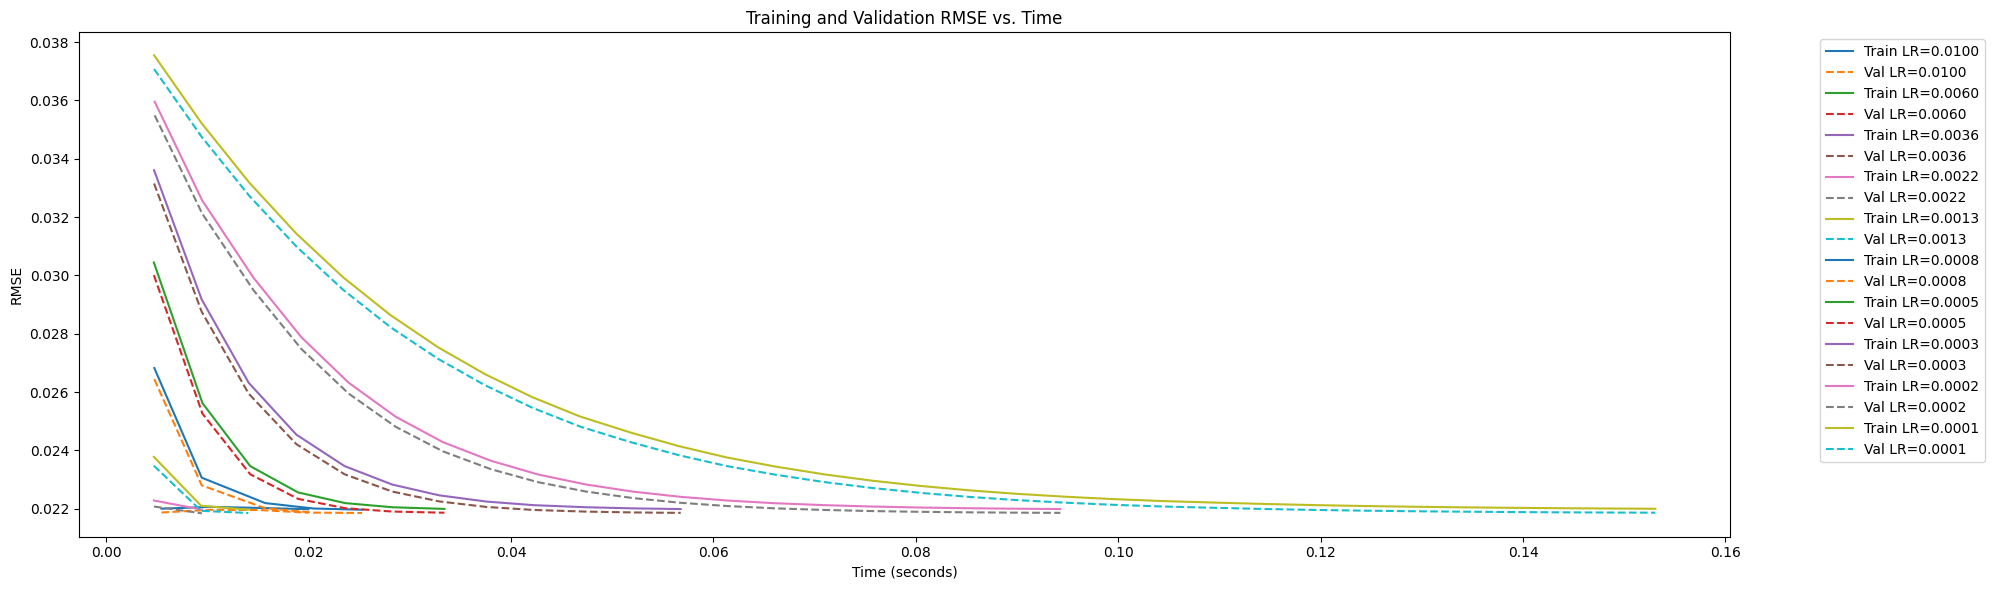

In [192]:
# Plot 2: RMSE vs Time
plt.figure(figsize=(20, 6))
for lr, data in results.items():
    times = data['times']
    plt.plot(times, data['train_rmse'], label=f'Train LR={lr:.4f}')
    plt.plot(times, data['val_rmse'], linestyle='--', label=f'Val LR={lr:.4f}')

plt.xlabel('Time (seconds)')
plt.ylabel('RMSE')
plt.title('Training and Validation RMSE vs. Time')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()